In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
df1=pd.read_csv('./mtcars.csv')
df1.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Drop Model
dataset=df1.drop('model',axis=1)
dataset.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [4]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('mpg',axis=1),0,list(dataset.drop('mpg',axis=1)))
dataset.drop('mpg',axis=1).loc[Outliers_to_drop]

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,8,301.0,335,3.54,3.570,14.60,0,1,5,8
14,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,8,440.0,230,3.23,5.345,17.42,0,0,3,4
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [14]:
list(dataset.drop('mpg',axis=1))

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [5]:
#Create New Dataset without Outliers
good_data = dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
mpg     27 non-null float64
cyl     27 non-null int64
disp    27 non-null float64
hp      27 non-null int64
drat    27 non-null float64
wt      27 non-null float64
qsec    27 non-null float64
vs      27 non-null int64
am      27 non-null int64
gear    27 non-null int64
carb    27 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.4 KB


In [6]:
#Create Standard Model

#Define x and y variable
x = good_data.drop('mpg',axis=1).values
y = good_data['mpg'].values

#Train dataset using 20% test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Prepare Models - Linear, Lasso, Ridge and Elastic-net 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
alpha=0.5

In [7]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

pipe_lasso= Pipeline([('scl', StandardScaler()),
                     ('clf', Lasso(alpha=alpha,random_state=100))])
pipeline.insert(1,pipe_lasso)

pipe_ridge= Pipeline([('scl', StandardScaler()),
                     ('clf', Ridge(alpha=alpha,random_state=100))])
pipeline.insert(2,pipe_ridge)

pipe_elas= Pipeline([('scl', StandardScaler()),
                     ('clf', ElasticNet(alpha=alpha,random_state=100))])
pipeline.insert(3,pipe_elas)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False], 
             'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

param_gridlasso = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(1,param_gridlasso)

param_gridridge = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(2,param_gridridge)

param_gridelas = {'clf__alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1e-1, 1, 5, 10, 20]}
modelpara.insert(3,param_gridelas)

In [8]:
# Create Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,
                                                            n_jobs=-1,random_state=100)
    
    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    train_std = np.sqrt(np.std(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))
    test_std = np.sqrt(np.std(-test_scores, axis=1))
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.ylim([-1,20])
    plt.show()

Leaning Curve - LM


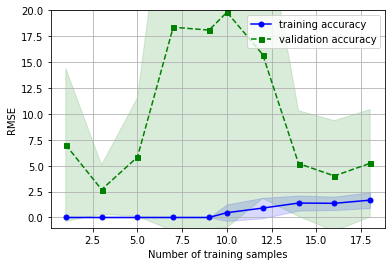

Leaning Curve - Lasso


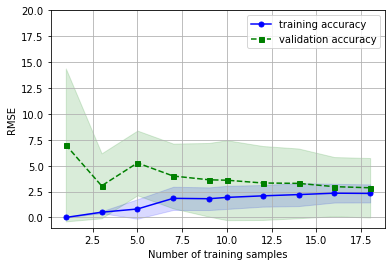

Leaning Curve - Ridge


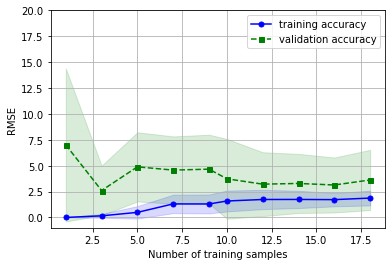

Leaning Curve - ElasticNet


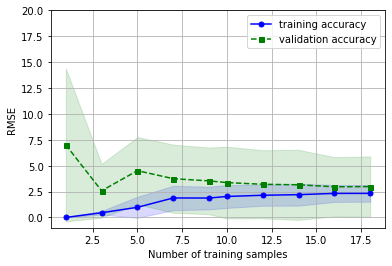

In [9]:
#Plot Learning Curve

print('Leaning Curve - LM')
plot_learning_curves(pipe_lm)
print('Leaning Curve - Lasso')
plot_learning_curves(pipe_lasso)
print('Leaning Curve - Ridge')
plot_learning_curves(pipe_ridge)
print('Leaning Curve - ElasticNet')
plot_learning_curves(pipe_elas)

Model Evaluation - Accuracy Score
LinearRegression 4.23
Lasso 2.67
Ridge 3.49
ElasticNet 2.81




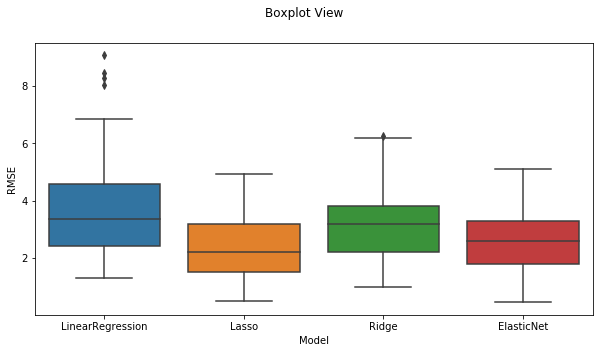

In [10]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression',pipe_lm))
models.append(('Lasso',pipe_lasso))
models.append(('Ridge',pipe_ridge))
models.append(('ElasticNet',pipe_elas))
  
#Model Evaluation
results =[]
names=[]
scoring ='neg_mean_squared_error'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(np.sqrt(-cv_results))
    names.append(name)
    print('{} {:.2f}'.format(name,np.sqrt(-cv_results.mean())))
print('\n')

#Boxplot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

In [11]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2,scoring='neg_mean_squared_error')
    gs_clf = gs_clf.fit(x_train2, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoresNested = cross_val_score(gs_clf, x_2, y, 
                             scoring='neg_mean_squared_error', cv=5,
                             n_jobs= -1)    
      
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')   
    for name, score in zip(list(good_data.drop('mpg',axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].coef_):
         print(name, round(score,2)) 
    
    #Print MSE and RMSE
    print('\nNestedCV MSE:  {:0.2f}'.format(np.mean(-scoresNested)))
    print('NestedCV RMSE:  {:0.2f}'.format(np.sqrt(np.mean(-scoresNested))))  

In [12]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True}

Intercept: 21.12

Model coefficients: 
cyl 1.04
disp 3.03
hp -0.5
drat 1.48
wt -3.25
qsec 7.33
vs -2.31
am 1.5
gear 1.24
carb 1.05

NestedCV MSE:  22.91
NestedCV RMSE:  4.79


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

Best Parameters: {'clf__alpha': 1}

Intercept: 21.12

Model coefficients: 
cyl -0.0
disp -0.0
hp -1.48
drat 0.0
wt -2.49
qsec 0.41
vs 0.0
am 0.0
gear 0.0
carb -0.0

NestedCV MSE:  10.99
NestedCV RMSE:  3.31


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=100, solver='auto', tol=0.001)

Best Parameters: {'clf__alpha': 10}

Intercept: 21.12

Model coefficients: 
cyl -0.39
disp -0.41
hp -0.94
drat 0.61
wt -1.04
qsec 0.82
vs 0.22
am 0.64
gear 0.31
carb -0.72

NestedCV MSE:  9.82
NestedCV RMSE:  3.13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Optimized Model

Model Name: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=100, selection='cyclic', tol=0.0001, warm_start=False)

Best Parameters: {'clf__alpha': 1}

Intercept: 21.12

Model coefficients: 
cyl -0.5
disp -0.43
hp -0.9
drat 0.49
wt -1.07
qsec 0.6
vs 0.14
am 0.45
gear 0.0
carb -0.41

NestedCV MSE:  10.45
NestedCV RMSE:  3.23


LinearRegression

Permutation Importance




Weight,Feature
2.5368 ± 0.8353,wt
0.7200 ± 1.2484,qsec
0.6379 ± 0.5130,drat
0.4315 ± 0.5771,gear
0.3683 ± 0.7830,am
0.1639 ± 0.3231,vs
0.1293 ± 0.1379,hp
0.0978 ± 0.3459,carb
-0.2810 ± 0.3593,cyl
-0.5748 ± 0.9199,disp


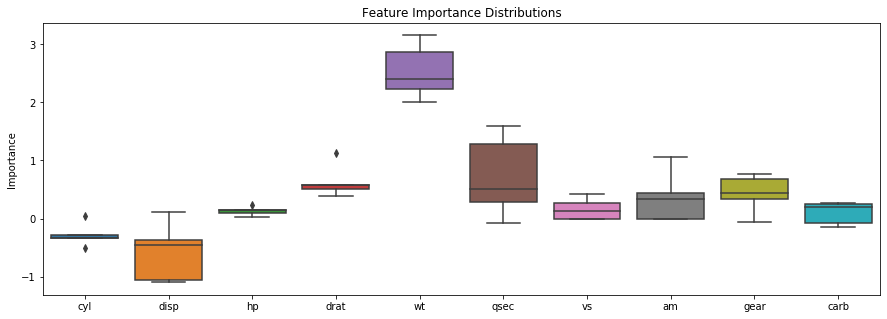

Lasso

Permutation Importance




Weight,Feature
0.9931 ± 0.3317,wt
0.1857 ± 0.1337,hp
0.0375 ± 0.0393,drat
0.0043 ± 0.0096,am
0 ± 0.0000,carb
0 ± 0.0000,gear
0 ± 0.0000,vs
0 ± 0.0000,disp
0 ± 0.0000,cyl
-0.0891 ± 0.1478,qsec


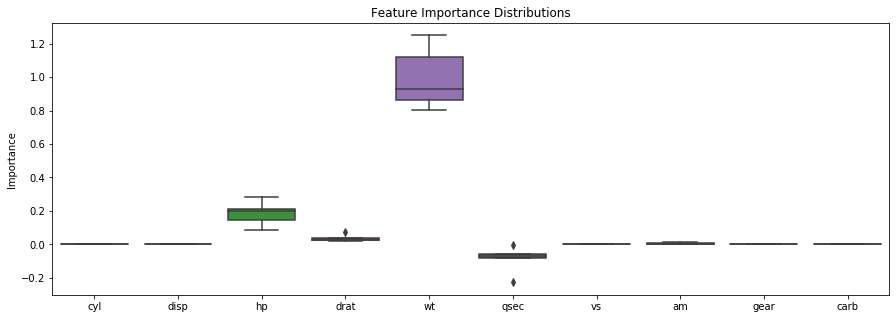

Ridge

Permutation Importance




Weight,Feature
1.1277 ± 0.3034,wt
0.2963 ± 0.2397,drat
0.1921 ± 0.2145,hp
0.1709 ± 0.2367,gear
0.1434 ± 0.3194,am
0.0480 ± 0.0855,vs
-0.0040 ± 0.0204,carb
-0.0842 ± 0.4588,qsec
-0.0893 ± 0.1777,cyl
-0.1606 ± 0.2403,disp


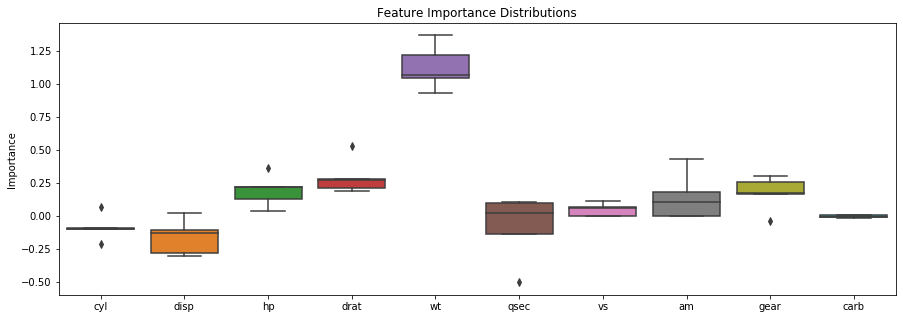

ElasticNet

Permutation Importance




Weight,Feature
0.3549 ± 0.0705,wt
0.1082 ± 0.1310,hp
0.0855 ± 0.0792,drat
0.0421 ± 0.0975,am
0.0337 ± 0.0354,disp
0.0294 ± 0.0427,cyl
0.0098 ± 0.0176,gear
-0.0008 ± 0.0015,vs
-0.0025 ± 0.0757,carb
-0.0977 ± 0.1365,qsec


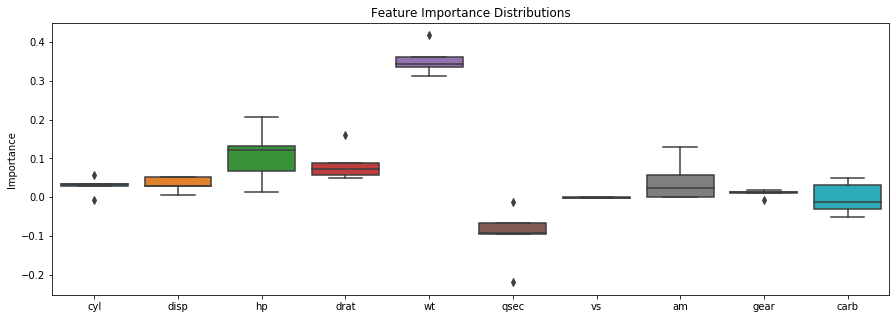

In [13]:
#Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=good_data.drop('mpg',axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=good_data.drop('mpg',axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()